In [160]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')


In [161]:
df = pd.read_csv('./vehicles.csv')


In [162]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [163]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### Drop Columns that aren't Relevant to the Analysis

In [164]:
df = df.drop(["url","region_url","VIN","image_url","county","lat","long","id","posting_date"],axis=1)

In [165]:
nans = (df.isnull().sum().sort_values(ascending=False)/(len(df))).to_frame()
#nans.plot(kind='bar',title="Missing Values Summary",figsize=(8,6))

### Take a look at missing data

In [166]:
nans['count'] = nans[0]
nans.reset_index(inplace=True)

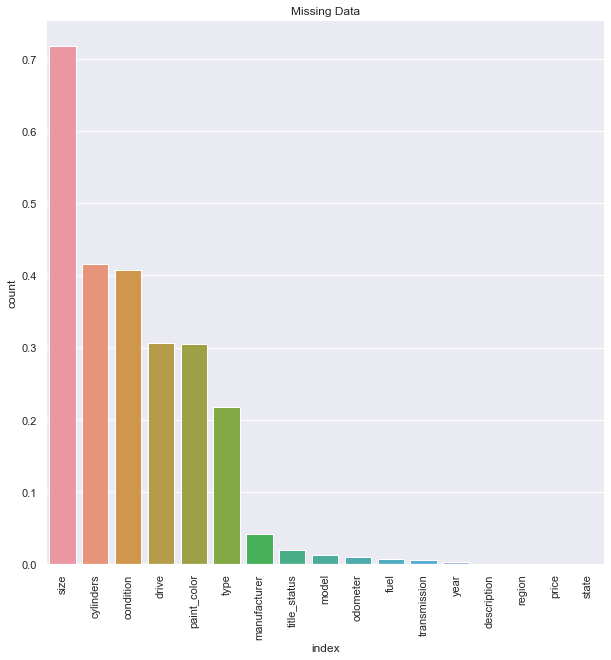

In [167]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'index', y= 'count', data=nans)
plt.xticks(rotation=90)
plt.title("Missing Data")
plt.show()

In [168]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [169]:
def caps(s):
    if type(s) is str:
        return s.capitalize()
    else:
        return None

In [170]:
df['manufacturer'] = df['manufacturer'].apply(caps)

In [171]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [172]:
df['manufacturer'].value_counts().head()

Ford         70985
Chevrolet    55064
Toyota       34202
Honda        21269
Nissan       19067
Name: manufacturer, dtype: int64

### Drop Null Values From Key Columns

In [173]:
df1 = df.copy()
df1.dropna(axis=0,how='any',subset=['manufacturer','title_status','odometer','year','price'],inplace=True)

In [174]:
df1['year'] = df1['year'].apply(lambda x: int(x))

In [175]:
filters = (df1['odometer'] > 5000.0) & (df1['odometer'] < 500000.0) & (df1['year'] >= 1955) & (df1['year'] < 2021) & (df1['price'] > 1500.0) & (df1['price'] < 99999) & (df1['manufacturer'] != 'harley-davidson') & (df1['cylinders'] != 'other')


In [176]:
df1 = df1[filters]

In [177]:
df1['year'].median()

2013.0

In [178]:
df1['price'].median()

15990.0

In [179]:
df1['odometer'].median()

90642.0

### View Data Distributions

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

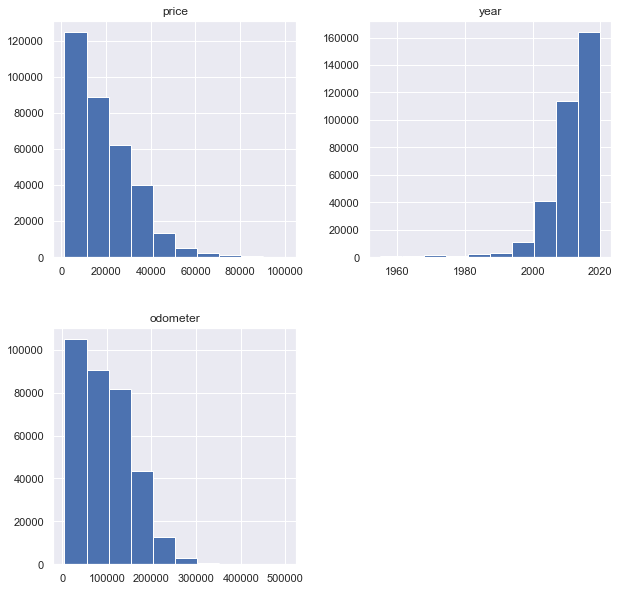

In [180]:
df1.hist(figsize=(10,10))

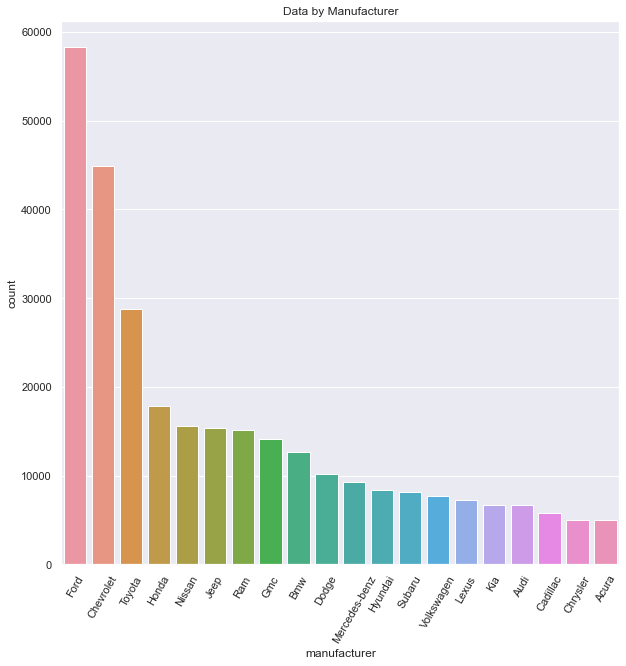

In [181]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'manufacturer',data = df1,order= df1['manufacturer'].value_counts().head(20).index)
plt.xticks(rotation=60)
plt.title("Data by Manufacturer")
plt.show()

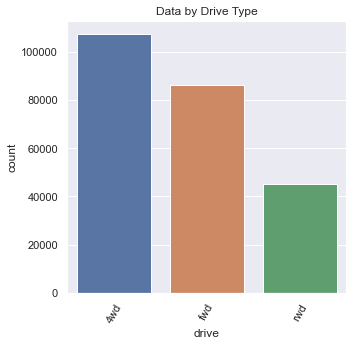

In [182]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'drive',data = df1,order= df1['drive'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Data by Drive Type")
plt.show()

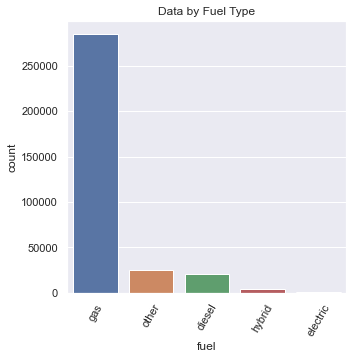

In [183]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'fuel',data = df1,order= df1['fuel'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Data by Fuel Type")
plt.show()

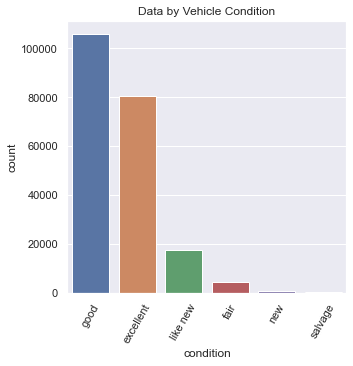

In [184]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'condition',data = df1,order= df1['condition'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Data by Vehicle Condition")
plt.show()

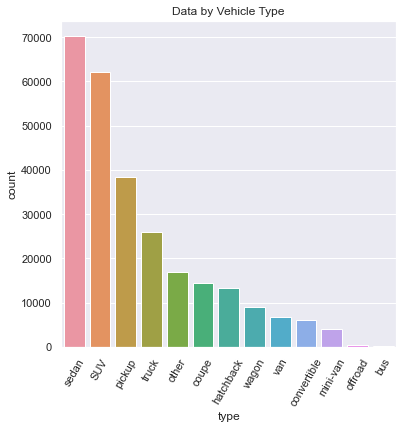

In [185]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'type',data = df1,order= df1['type'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Data by Vehicle Type")
plt.show()

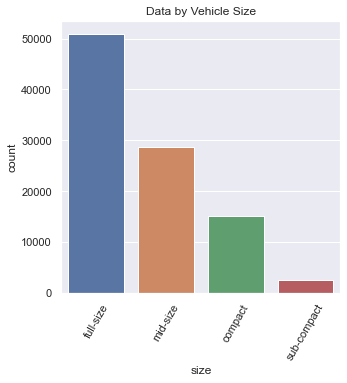

In [186]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'size',data = df1,order= df1['size'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Data by Vehicle Size")
plt.show()

### Age vs. Listing Price

In [187]:
df2 = df1.copy()

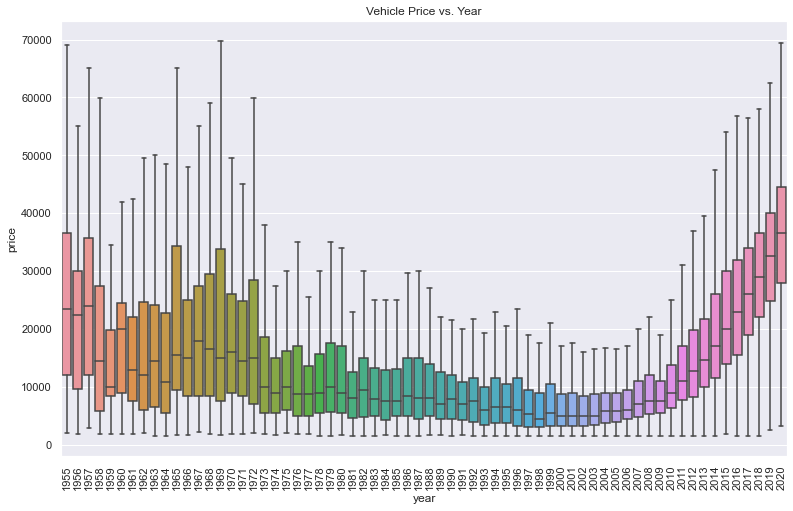

In [188]:
plt.figure(figsize=(13,8))
sns.boxplot(y="price", x="year",data=df2,showfliers = False)
plt.xticks(rotation=90)
plt.title("Vehicle Price vs. Year")
plt.show()

### View Correlations Between Numerical Data

In [189]:
filt2 = (df2['year'] > 1999) & (df1['year'] < 2021) & (df2['manufacturer'] != 'Harley-davidson')


In [190]:
df2 = df2[filt2]

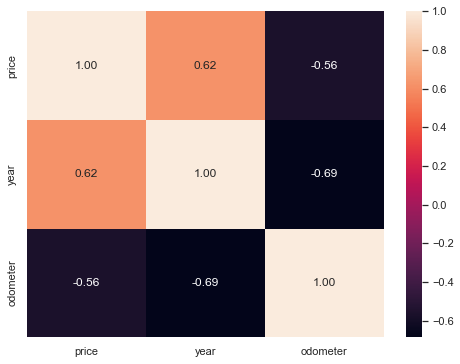

In [191]:
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(method='pearson'),annot=True,fmt='.2f')
plt.show()

### Create New Dataframe Using Features Relevant for Our Analysis

In [192]:
df3 = df2[['price','manufacturer','condition','cylinders','fuel','odometer','year',
          'title_status','transmission','drive','size','type','paint_color']]

In [193]:
df3=df3.copy()
df3['age'] = (2022 - df3['year'])

In [194]:
df3.shape


(321323, 14)

### Filter Make / Manufacturer Data With Less than 50 Entries

In [195]:
df3 = df3.groupby('manufacturer').filter(lambda x : len(x)>50)

### Group by Fuel Type and Manufacturer

In [196]:
fuel_group = df3.groupby(['fuel'])

In [197]:
manu_group = df3.groupby(['manufacturer'])

### View Price/Age and Price/Mileage correlations by group

In [198]:
age_corr_df = df3[['age','price']].corr(method='pearson')
odo_corr_df = df3[['odometer','price']].corr(method='pearson')

In [199]:
age_corr = age_corr_df.iloc[0,1]
odo_corr = odo_corr_df.iloc[0,1]

In [200]:
age_corr

-0.62451008603526

In [201]:
age_corr_manu = manu_group[['age','price']].corr(method='pearson')
odo_corr_manu = manu_group[['odometer','price']].corr(method='pearson')
age_corr_fuel = fuel_group[['age','price']].corr(method='pearson')
odo_corr_fuel = fuel_group[['odometer','price']].corr(method='pearson')

In [202]:
#age_corr_fuel

In [203]:
fuel1 = age_corr_fuel.reset_index()
fuel1.set_index('fuel',inplace=True)

In [204]:
fuel2 = odo_corr_fuel.reset_index()
fuel2.set_index('fuel',inplace=True)

In [205]:
age1 = age_corr_manu.reset_index()
age1.set_index('manufacturer',inplace=True)

In [206]:
odo1 = odo_corr_manu.reset_index()
odo1.set_index('manufacturer',inplace=True)

In [207]:
fuel1 = fuel1[fuel1['level_1'] == 'age']

In [208]:
fuel2 = fuel2[fuel2['level_1'] == 'odometer']

In [209]:
fuel1 = fuel1.rename(columns={'price':'age_corr'})

In [210]:
fuel2 = fuel2.rename(columns={'price': "odo_corr"})

In [211]:
fuelplt = pd.concat([fuel1,fuel2],axis=1)

In [212]:
fuelplt['Miles'] = (fuelplt['odo_corr'] - odo_corr) / odo_corr

In [213]:
fuelplt['Age'] = (fuelplt['age_corr'] - age_corr) / age_corr

In [214]:
age1 = age1[age1['level_1'] == 'age']
odo1 = odo1[odo1['level_1'] == 'odometer']

In [215]:
odo1 = odo1.rename(columns={'price':'odo-price'})

In [216]:
age1 = age1.rename(columns={'price':'age-price'})

In [217]:
dfplt = pd.concat([odo1,age1],axis=1)

In [218]:
#dfplt.head()

In [219]:
dfplt['Miles'] = (dfplt['odo-price'] - odo_corr) / odo_corr

In [220]:
dfplt['Age'] = (dfplt['age-price'] - age_corr) / age_corr

In [221]:
dfplt = dfplt.sort_values(by='Miles',ascending=False)

In [222]:
#dfplt.head()

In [223]:
dfpltmax = dfplt.nlargest(10,columns='Age').sort_values(by='Age')
dfpltmin = dfplt.nsmallest(10,columns='Age').sort_values(by='Age',ascending=False)

Text(0.5, 1.0, 'Price Depreciation by Manufacturer (10 Highest)')

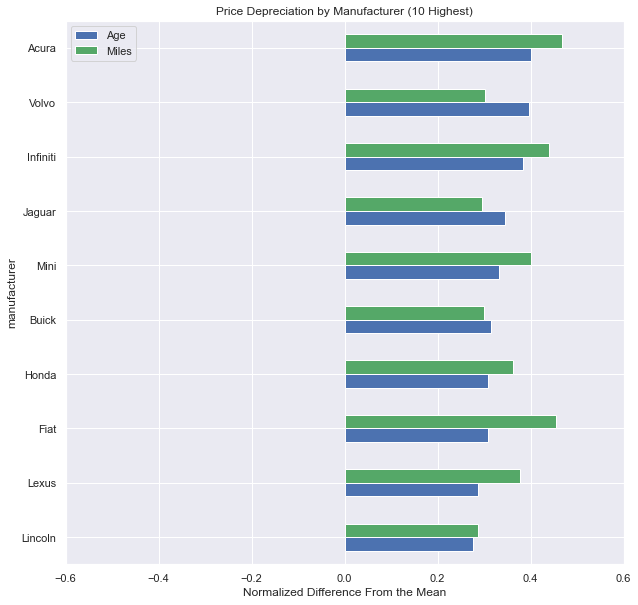

In [224]:
ax = dfpltmax[['Age','Miles']].plot(kind='barh',xlim=(-.6,.6),color=['b','g'],figsize=(10,10))
ax.set_xlabel("Normalized Difference From the Mean")
ax.set_title("Price Depreciation by Manufacturer (10 Highest)")

Text(0.5, 1.0, 'Price Depreciation by Manufacturer (10 Lowest)')

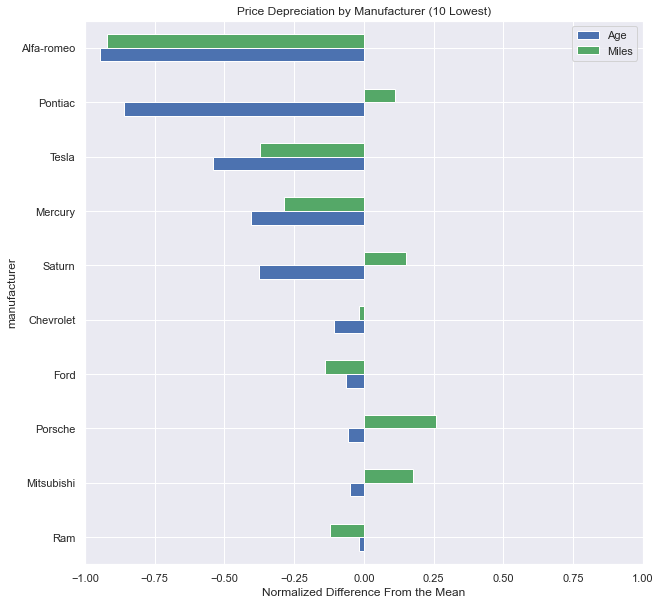

In [225]:
ax = dfpltmin[['Age','Miles']].plot(kind='barh',xlim=(-1,1),color=['b','g'],figsize=(10,10))
ax.set_xlabel("Normalized Difference From the Mean")
ax.set_title("Price Depreciation by Manufacturer (10 Lowest)")

In [226]:
fuelplt = fuelplt.sort_values(by='Age',ascending=True)

In [227]:
fuelplt.drop(['other'],axis=0,inplace=True)

Text(0.5, 0, 'Normalized Difference From the Mean')

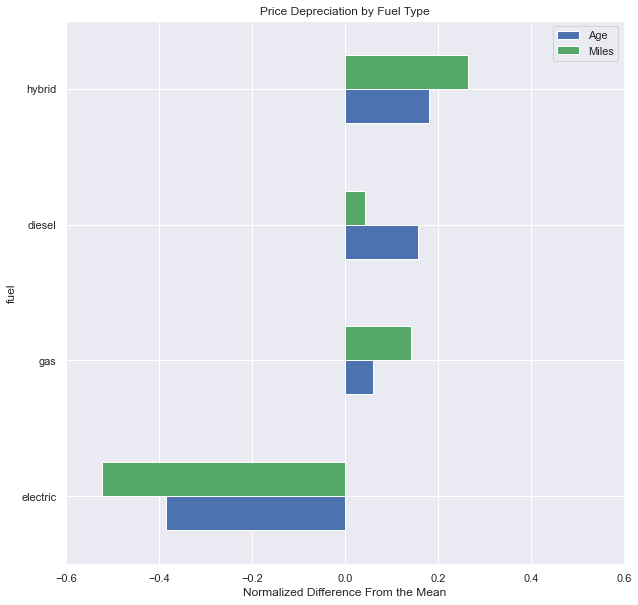

In [228]:
ax = fuelplt[['Age','Miles']].plot(kind='barh',title="Price Depreciation by Fuel Type",xlim=(-.6,.6),color=['b','g']
                              ,figsize=(10,10))
ax.set_xlabel("Normalized Difference From the Mean")